# Process our data

In [282]:
import pandas as pd
raw_data = pd.read_csv("flights_data.csv")

In [283]:
raw_data

,Departing_Port,Arriving_Port,Month,Year,Average_Fare,Distance,MinTemp,MaxTemp,Rainfall,Evaporation,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Airline,Departure_Delays_%,Arrival_Delays_%,Cancellations_%
0,Adelaide,Melbourne,1,2010,414.0,641.652927,17.33103,29.763540,2.198292,8.894267,...,1013.053858,1010.905502,4.167756,4.016930,22.526185,27.847663,Jetstar,0.255319,0.234043,0.000000
1,Adelaide,Melbourne,1,2010,414.0,641.652927,17.33103,29.763540,2.198292,8.894267,...,1013.053858,1010.905502,4.167756,4.016930,22.526185,27.847663,Qantas,0.087542,0.090909,0.003367
2,Adelaide,Melbourne,1,2010,414.0,641.652927,17.33103,29.763540,2.198292,8.894267,...,1013.053858,1010.905502,4.167756,4.016930,22.526185,27.847663,Tigerair Australia,0.083333,0.033333,0.050000
3,Adelaide,Melbourne,1,2010,414.0,641.652927,17.33103,29.763540,2.198292,8.894267,...,1013.053858,1010.905502,4.167756,4.016930,22.526185,27.847663,Virgin Australia,0.072874,0.068826,0.012146
4,Adelaide,Canberra,1,2010,414.0,970.229046,17.33103,29.763540,2.198292,8.894267,...,1013.053858,1010.905502,4.167756,4.016930,22.526185,27.847663,Qantas,0.111111,0.083333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30111,Moranbah,Brisbane,6,2017,1277.0,779.683481,7.14584,18.217691,1.944638,2.741813,...,1025.984182,1023.486260,4.872945,5.115312,11.379967,16.965475,Virgin Australia,0.078431,0.058824,0.000000
30112,Armidale,Sydney,6,2017,326.0,382.268024,7.14584,18.217691,1.944638,2.741813,...,1025.984182,1023.486260,4.872945,5.115312,11.379967,16.965475,QantasLink,0.256198,0.297521,0.115702
30113,Armidale,Sydney,6,2017,326.0,382.268024,7.14584,18.217691,1.944638,2.741813,...,1025.984182,1023.486260,4.872945,5.115312,11.379967,16.965475,Regional Express,0.278481,0.329114,0.050633
30114,Tamworth,Sydney,6,2017,643.0,319.769513,7.14584,18.217691,1.944638,2.741813,...,1025.984182,1023.486260,4.872945,5.115312,11.379967,16.965475,QantasLink,0.180645,0.174194,0.051613


## Convert categorical variables to integer values

In [284]:
raw_data["Average_Delay_%"] = (raw_data["Arrival_Delays_%"] + raw_data["Departure_Delays_%"]) * 0.5

In [285]:
categorical_variables = ["Departing_Port", "Arriving_Port", "Airline"]

In [286]:
# Convert categorical variables into integers
processed_data = raw_data.copy()

processed_data[categorical_variables] = processed_data[categorical_variables].astype('category')
processed_data[categorical_variables] = processed_data[categorical_variables].apply(lambda x: x.cat.codes)

processed_data = processed_data.sort_values(["Year", "Month", "Departing_Port", "Arriving_Port", "Airline"])

In [287]:
processed_data

,Departing_Port,Arriving_Port,Month,Year,Average_Fare,Distance,MinTemp,MaxTemp,Rainfall,Evaporation,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Airline,Departure_Delays_%,Arrival_Delays_%,Cancellations_%,Average_Delay_%
11,0,2,1,2010,414.0,1316.720677,17.33103,29.763540,2.198292,8.894267,...,1010.905502,4.167756,4.016930,22.526185,27.847663,1,0.000000,0.000000,0.000000,0.000000
12,0,2,1,2010,414.0,1316.720677,17.33103,29.763540,2.198292,8.894267,...,1010.905502,4.167756,4.016930,22.526185,27.847663,5,0.153846,0.153846,0.000000,0.153846
16,0,6,1,2010,414.0,1619.982414,17.33103,29.763540,2.198292,8.894267,...,1010.905502,4.167756,4.016930,22.526185,27.847663,0,0.266667,0.233333,0.000000,0.250000
17,0,6,1,2010,414.0,1619.982414,17.33103,29.763540,2.198292,8.894267,...,1010.905502,4.167756,4.016930,22.526185,27.847663,1,0.053191,0.031915,0.000000,0.042553
18,0,6,1,2010,414.0,1619.982414,17.33103,29.763540,2.198292,8.894267,...,1010.905502,4.167756,4.016930,22.526185,27.847663,6,0.064516,0.064516,0.000000,0.064516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30093,39,9,6,2017,20941.0,284.013192,7.14584,18.217691,1.944638,2.741813,...,1023.486260,4.872945,5.115312,11.379967,16.965475,3,0.066667,0.066667,0.044444,0.066667
30094,39,37,6,2017,21097.0,1691.132106,7.14584,18.217691,1.944638,2.741813,...,1023.486260,4.872945,5.115312,11.379967,16.965475,0,0.500000,0.300000,0.000000,0.400000
30095,39,37,6,2017,21097.0,1691.132106,7.14584,18.217691,1.944638,2.741813,...,1023.486260,4.872945,5.115312,11.379967,16.965475,6,0.263158,0.210526,0.000000,0.236842
30096,40,37,6,2017,26286.0,365.844014,7.14584,18.217691,1.944638,2.741813,...,1023.486260,4.872945,5.115312,11.379967,16.965475,2,0.187500,0.178571,0.026786,0.183036


## Create date column and make it the index.
Also, delete "Month" and "Year" columns.

In [288]:
processed_data["Date"] = processed_data["Year"].astype("str") + "-" + processed_data["Month"].astype("str") + "-1"
processed_data["Date"] = pd.to_datetime(processed_data["Date"])

In [289]:
processed_data = processed_data.set_index(processed_data["Date"])

In [290]:
del processed_data["Month"]
del processed_data["Year"]

In [291]:
processed_data

,Departing_Port,Arriving_Port,Average_Fare,Distance,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Airline,Departure_Delays_%,Arrival_Delays_%,Cancellations_%,Average_Delay_%,Date
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,0,2,414.0,1316.720677,17.33103,29.763540,2.198292,8.894267,9.385116,43.838095,...,4.167756,4.016930,22.526185,27.847663,1,0.000000,0.000000,0.000000,0.000000,2010-01-01
2010-01-01,0,2,414.0,1316.720677,17.33103,29.763540,2.198292,8.894267,9.385116,43.838095,...,4.167756,4.016930,22.526185,27.847663,5,0.153846,0.153846,0.000000,0.153846,2010-01-01
2010-01-01,0,6,414.0,1619.982414,17.33103,29.763540,2.198292,8.894267,9.385116,43.838095,...,4.167756,4.016930,22.526185,27.847663,0,0.266667,0.233333,0.000000,0.250000,2010-01-01
2010-01-01,0,6,414.0,1619.982414,17.33103,29.763540,2.198292,8.894267,9.385116,43.838095,...,4.167756,4.016930,22.526185,27.847663,1,0.053191,0.031915,0.000000,0.042553,2010-01-01
2010-01-01,0,6,414.0,1619.982414,17.33103,29.763540,2.198292,8.894267,9.385116,43.838095,...,4.167756,4.016930,22.526185,27.847663,6,0.064516,0.064516,0.000000,0.064516,2010-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-01,39,9,20941.0,284.013192,7.14584,18.217691,1.944638,2.741813,6.264984,31.617153,...,4.872945,5.115312,11.379967,16.965475,3,0.066667,0.066667,0.044444,0.066667,2017-06-01
2017-06-01,39,37,21097.0,1691.132106,7.14584,18.217691,1.944638,2.741813,6.264984,31.617153,...,4.872945,5.115312,11.379967,16.965475,0,0.500000,0.300000,0.000000,0.400000,2017-06-01
2017-06-01,39,37,21097.0,1691.132106,7.14584,18.217691,1.944638,2.741813,6.264984,31.617153,...,4.872945,5.115312,11.379967,16.965475,6,0.263158,0.210526,0.000000,0.236842,2017-06-01


## Normalise the data to a value range of 0-1 (for continuous variables)

In [292]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

continuous_features = processed_data.select_dtypes("float").columns.values

processed_data[continuous_features] = scaler.fit_transform(processed_data[continuous_features])
processed_data

,Departing_Port,Arriving_Port,Average_Fare,Distance,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Airline,Departure_Delays_%,Arrival_Delays_%,Cancellations_%,Average_Delay_%,Date
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,0,2,-0.978964,-0.359004,0.856267,0.933268,-0.270139,0.796919,0.863890,0.647422,...,-0.492710,-0.672732,0.92875,0.924884,1,-1.000000,-1.000000,-1.000000,-1.000000,2010-01-01
2010-01-01,0,2,-0.978964,-0.359004,0.856267,0.933268,-0.270139,0.796919,0.863890,0.647422,...,-0.492710,-0.672732,0.92875,0.924884,5,-0.692308,-0.692308,-1.000000,-0.692308,2010-01-01
2010-01-01,0,6,-0.978964,-0.179102,0.856267,0.933268,-0.270139,0.796919,0.863890,0.647422,...,-0.492710,-0.672732,0.92875,0.924884,0,-0.466667,-0.533333,-1.000000,-0.500000,2010-01-01
2010-01-01,0,6,-0.978964,-0.179102,0.856267,0.933268,-0.270139,0.796919,0.863890,0.647422,...,-0.492710,-0.672732,0.92875,0.924884,1,-0.893617,-0.936170,-1.000000,-0.914894,2010-01-01
2010-01-01,0,6,-0.978964,-0.179102,0.856267,0.933268,-0.270139,0.796919,0.863890,0.647422,...,-0.492710,-0.672732,0.92875,0.924884,6,-0.870968,-0.870968,-1.000000,-0.870968,2010-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-01,39,9,0.064021,-0.971632,-0.866654,-0.722034,-0.402846,-0.859416,-0.561166,-1.000000,...,0.281368,0.353538,-0.81970,-0.730708,3,-0.866667,-0.866667,-0.878014,-0.866667,2017-06-01
2017-06-01,39,37,0.071948,-0.136894,-0.866654,-0.722034,-0.402846,-0.859416,-0.561166,-1.000000,...,0.281368,0.353538,-0.81970,-0.730708,0,0.000000,-0.400000,-1.000000,-0.200000,2017-06-01
2017-06-01,39,37,0.071948,-0.136894,-0.866654,-0.722034,-0.402846,-0.859416,-0.561166,-1.000000,...,0.281368,0.353538,-0.81970,-0.730708,6,-0.473684,-0.578947,-1.000000,-0.526316,2017-06-01


In [293]:
import torch
from torch.utils.data import Dataset, DataLoader

# Remove Input Features which add dimensionality

In [294]:
processed_data_stripped = processed_data.copy()

In [295]:
del processed_data_stripped["Departing_Port"]
del processed_data_stripped["Arriving_Port"]
del processed_data_stripped["Airline"]
del processed_data_stripped["Distance"]

In [296]:
processed_data_stripped

,Average_Fare,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Departure_Delays_%,Arrival_Delays_%,Cancellations_%,Average_Delay_%,Date
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,-0.978964,0.856267,0.933268,-0.270139,0.796919,0.863890,0.647422,0.372448,0.572945,-0.743469,...,-0.75723,-0.492710,-0.672732,0.92875,0.924884,-1.000000,-1.000000,-1.000000,-1.000000,2010-01-01
2010-01-01,-0.978964,0.856267,0.933268,-0.270139,0.796919,0.863890,0.647422,0.372448,0.572945,-0.743469,...,-0.75723,-0.492710,-0.672732,0.92875,0.924884,-0.692308,-0.692308,-1.000000,-0.692308,2010-01-01
2010-01-01,-0.978964,0.856267,0.933268,-0.270139,0.796919,0.863890,0.647422,0.372448,0.572945,-0.743469,...,-0.75723,-0.492710,-0.672732,0.92875,0.924884,-0.466667,-0.533333,-1.000000,-0.500000,2010-01-01
2010-01-01,-0.978964,0.856267,0.933268,-0.270139,0.796919,0.863890,0.647422,0.372448,0.572945,-0.743469,...,-0.75723,-0.492710,-0.672732,0.92875,0.924884,-0.893617,-0.936170,-1.000000,-0.914894,2010-01-01
2010-01-01,-0.978964,0.856267,0.933268,-0.270139,0.796919,0.863890,0.647422,0.372448,0.572945,-0.743469,...,-0.75723,-0.492710,-0.672732,0.92875,0.924884,-0.870968,-0.870968,-1.000000,-0.870968,2010-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-01,0.064021,-0.866654,-0.722034,-0.402846,-0.859416,-0.561166,-1.000000,-1.000000,-1.000000,0.830941,...,1.00000,0.281368,0.353538,-0.81970,-0.730708,-0.866667,-0.866667,-0.878014,-0.866667,2017-06-01
2017-06-01,0.071948,-0.866654,-0.722034,-0.402846,-0.859416,-0.561166,-1.000000,-1.000000,-1.000000,0.830941,...,1.00000,0.281368,0.353538,-0.81970,-0.730708,0.000000,-0.400000,-1.000000,-0.200000,2017-06-01
2017-06-01,0.071948,-0.866654,-0.722034,-0.402846,-0.859416,-0.561166,-1.000000,-1.000000,-1.000000,0.830941,...,1.00000,0.281368,0.353538,-0.81970,-0.730708,-0.473684,-0.578947,-1.000000,-0.526316,2017-06-01


## Resample all data so each date only appears once

In [297]:
from datetime import datetime

processed_data_stripped = processed_data_stripped.resample("1M").mean().sort_values(["Date"])
processed_data_stripped.index = [datetime(x.year, x.month, 1) for x in processed_data_stripped.index]

In [298]:
processed_data_stripped

,Average_Fare,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Departure_Delays_%,Arrival_Delays_%,Cancellations_%,Average_Delay_%
2010-01-01,-0.978964,0.856267,0.933268,-0.270139,0.796919,0.863890,0.647422,0.372448,0.572945,-0.743469,...,-0.733436,-0.757230,-0.492710,-0.672732,0.928750,0.924884,-0.753857,-0.753079,-0.982163,-0.753468
2010-02-01,-0.978964,1.000000,0.825312,0.571983,0.401802,0.525122,0.465555,0.329709,0.339851,-0.105786,...,-0.346896,-0.335479,-0.230797,-0.098319,0.897853,0.834774,-0.708054,-0.684311,-0.977535,-0.696182
2010-03-01,-0.978964,0.648732,0.513030,0.030027,-0.009011,0.085560,0.023968,-0.068296,-0.026963,0.069055,...,0.115387,0.124632,-0.169272,-0.222354,0.522941,0.562586,-0.683586,-0.679725,-0.959996,-0.681655
2010-04-01,-0.978964,0.188854,0.067264,-0.590729,-0.540250,-0.281178,-0.505082,-0.295232,-0.406949,0.247822,...,0.048014,0.003168,-0.199903,0.111603,0.231739,0.111223,-0.720898,-0.721203,-0.980574,-0.721050
2010-05-01,-0.978964,-0.491670,-0.490015,-0.167351,-0.835741,-0.548955,-0.597361,-0.590519,-0.705676,0.542571,...,-0.008863,-0.058170,-0.293966,-0.054459,-0.425792,-0.469119,-0.750993,-0.712938,-0.986387,-0.731966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-01,-0.944469,0.826521,0.845527,0.107492,0.682252,0.621470,0.408494,0.184715,0.207762,-0.254663,...,-0.573658,-0.605251,0.320343,-0.219793,0.796073,0.844493,-0.671731,-0.670782,-0.963113,-0.671257
2017-03-01,-0.942045,0.802754,0.660969,0.741110,0.364914,0.036203,0.158345,-0.047858,-0.063320,0.244136,...,-0.450618,-0.468582,0.576297,0.154510,0.657775,0.672524,-0.594999,-0.581883,-0.900795,-0.588441
2017-04-01,-0.945396,0.018170,0.025362,-0.403561,-0.216227,-0.031805,-0.477357,-0.363960,-0.516853,0.109546,...,0.378250,0.322268,0.337699,0.162064,0.121529,0.023327,-0.728102,-0.750571,-0.938085,-0.739337
2017-05-01,-0.944012,-0.464726,-0.428400,-0.636796,-0.696793,-0.450549,-0.769925,-0.762823,-0.804369,0.608254,...,0.429512,0.410767,0.279823,0.143180,-0.391406,-0.448821,-0.734975,-0.748771,-0.976520,-0.741873


In [299]:
processed_data = processed_data_stripped

## Decide on input and output features

In [300]:
processed_data.head()

,Average_Fare,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Departure_Delays_%,Arrival_Delays_%,Cancellations_%,Average_Delay_%
2010-01-01,-0.978964,0.856267,0.933268,-0.270139,0.796919,0.863890,0.647422,0.372448,0.572945,-0.743469,...,-0.733436,-0.757230,-0.492710,-0.672732,0.928750,0.924884,-0.753857,-0.753079,-0.982163,-0.753468
2010-02-01,-0.978964,1.000000,0.825312,0.571983,0.401802,0.525122,0.465555,0.329709,0.339851,-0.105786,...,-0.346896,-0.335479,-0.230797,-0.098319,0.897853,0.834774,-0.708054,-0.684311,-0.977535,-0.696182
2010-03-01,-0.978964,0.648732,0.513030,0.030027,-0.009011,0.085560,0.023968,-0.068296,-0.026963,0.069055,...,0.115387,0.124632,-0.169272,-0.222354,0.522941,0.562586,-0.683586,-0.679725,-0.959996,-0.681655
2010-04-01,-0.978964,0.188854,0.067264,-0.590729,-0.540250,-0.281178,-0.505082,-0.295232,-0.406949,0.247822,...,0.048014,0.003168,-0.199903,0.111603,0.231739,0.111223,-0.720898,-0.721203,-0.980574,-0.721050
2010-05-01,-0.978964,-0.491670,-0.490015,-0.167351,-0.835741,-0.548955,-0.597361,-0.590519,-0.705676,0.542571,...,-0.008863,-0.058170,-0.293966,-0.054459,-0.425792,-0.469119,-0.750993,-0.712938,-0.986387,-0.731966


In [301]:
output_features = ["Average_Fare", "Average_Delay_%", 'Cancellations_%']

In [302]:
input_features = [#'Departing_Port', 'Arriving_Port', 'Airline', 'Distance'
       'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']

# Train Model
Source: https://github.com/pmnyc/my_tools/blob/master/Multivariate%20Time%20Series%20Forecasting%20with%20LSTMs%20in%20PyTorch.ipynb

In [306]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib
matplotlib.use('Agg')
%matplotlib inline

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [320]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()

    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [328]:
values = processed_data.values

# integer encode direction
#encoder = LabelEncoder()
#values[:,4] = encoder.fit_transform(values[:,4])

# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# frame as supervised learning
reframed = series_to_supervised(scaled, 24, 12)
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)

reframed.head()

,var1(t-24),var2(t-24),var3(t-24),var4(t-24),var5(t-24),var6(t-24),var7(t-24),var8(t-24),var9(t-24),var10(t-24),...,var12(t+11),var13(t+11),var14(t+11),var15(t+11),var16(t+11),var17(t+11),var18(t+11),var19(t+11),var20(t+11),var21(t+11)
24,0.0,0.928133,0.966634,0.364930,0.898459,0.931945,0.823711,0.686224,0.786472,0.128266,...,0.108744,0.097890,0.589999,0.250897,0.943241,0.865705,0.704776,0.764919,0.059940,0.737190
25,0.0,1.000000,0.912656,0.785991,0.700901,0.762561,0.732777,0.664855,0.669925,0.447107,...,0.073865,0.062429,0.196452,0.016977,0.981669,0.975268,0.774006,0.693091,0.253694,0.730397
26,0.0,0.824366,0.756515,0.515013,0.495495,0.542780,0.511984,0.465852,0.486519,0.534527,...,0.175745,0.165700,0.173162,0.164264,0.923560,0.952451,0.847801,0.874470,0.290341,0.862174
27,0.0,0.594427,0.533632,0.204636,0.229875,0.359411,0.247459,0.352384,0.296526,0.623911,...,0.351602,0.337543,0.279450,0.387430,0.792336,0.803929,0.714949,0.693504,0.095083,0.703391
28,0.0,0.254165,0.254993,0.416325,0.082130,0.225523,0.201320,0.204741,0.147162,0.771286,...,0.541630,0.514563,0.234836,0.395178,0.590691,0.583005,0.576311,0.550247,0.122981,0.562264


In [329]:
data = reframed.values

n_split = 3 * 12
# n_split = int(0.3 * len(data))
print(n_split)

train_X = Variable(torch.from_numpy(data[n_split:, :-1]), requires_grad=False)
train_y = Variable(torch.from_numpy(data[n_split:, 1:]), requires_grad=False)
test_X = Variable(torch.from_numpy(data[:n_split, :-1]), requires_grad=False)
test_y = Variable(torch.from_numpy(data[:n_split, 1:]), requires_grad=False)

print(train_X.size(), train_y.size(), test_X.size(), test_y.size())

36
torch.Size([19, 755]) torch.Size([19, 755]) torch.Size([36, 755]) torch.Size([36, 755])


In [330]:
class Sequence(nn.Module):
    def __init__(self):
        super(Sequence, self).__init__()
        self.lstm1 = nn.LSTMCell(1, 51)
        self.lstm2 = nn.LSTMCell(51, 1)

    def forward(self, input, future=0):
        outputs = []
        h_t = Variable(
            torch.zeros(input.size(0), 51), requires_grad=False)
        c_t = Variable(
            torch.zeros(input.size(0), 51), requires_grad=False)
        h_t2 = Variable(
            torch.zeros(input.size(0), 1), requires_grad=False)
        c_t2 = Variable(
            torch.zeros(input.size(0), 1), requires_grad=False)

        for i, input_t in enumerate(input.chunk(input.size(1), dim=1)):
            h_t, c_t = self.lstm1(input_t, (h_t, c_t))
            h_t2, c_t2 = self.lstm2(c_t, (h_t2, c_t2))
            outputs += [c_t2]

        for i in range(future):  # if we should predict the future
            h_t, c_t = self.lstm1(c_t2, (h_t, c_t))
            h_t2, c_t2 = self.lstm2(c_t, (h_t2, c_t2))
            outputs += [c_t2]

        outputs = torch.stack(outputs, 1).squeeze(2)
        return outputs

In [342]:
# build the model
seq = Sequence()
# seq.double()
criterion = nn.MSELoss()

# use LBFGS as optimizer since we can load the whole data to train
optimizer = optim.Adam(seq.parameters())

loss_list = []
test_loss_list = []

epoch_num = 50

# begin to train
for epoch in range(epoch_num):
    print('epoch : ', epoch)

    def closure():
        optimizer.zero_grad()
        out = seq(train_X)
        loss = criterion(out, train_y)
        # print('loss:', loss.data.numpy())
        loss_list.append(loss.data.numpy())
        loss.backward()
        return loss

    optimizer.step(closure)

    pred = seq(test_X)
    loss = criterion(pred, test_y)
#     print('test loss:', loss.data.numpy())
    test_loss_list.append(loss.data.numpy())

    y = pred.data.numpy()

epoch :  0
epoch :  1
epoch :  2
epoch :  3
epoch :  4
epoch :  5
epoch :  6
epoch :  7
epoch :  8
epoch :  9
epoch :  10
epoch :  11
epoch :  12
epoch :  13
epoch :  14
epoch :  15
epoch :  16
epoch :  17
epoch :  18
epoch :  19
epoch :  20
epoch :  21
epoch :  22
epoch :  23
epoch :  24
epoch :  25
epoch :  26
epoch :  27
epoch :  28
epoch :  29
epoch :  30
epoch :  31
epoch :  32
epoch :  33
epoch :  34
epoch :  35
epoch :  36
epoch :  37
epoch :  38
epoch :  39
epoch :  40
epoch :  41
epoch :  42
epoch :  43
epoch :  44
epoch :  45
epoch :  46
epoch :  47
epoch :  48
epoch :  49


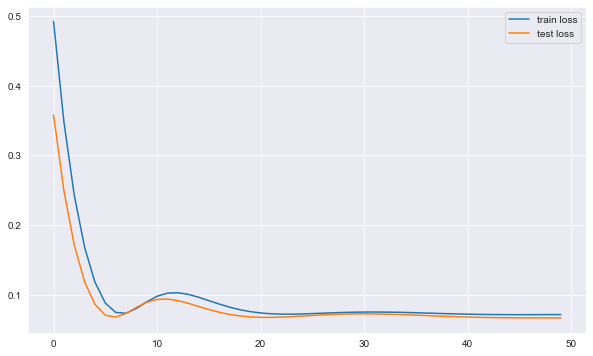

In [343]:
plt.figure(figsize=(10,6))
plt.plot(range(epoch_num), loss_list, label='train loss')
plt.plot(range(epoch_num), test_loss_list, label='test loss')
plt.legend()

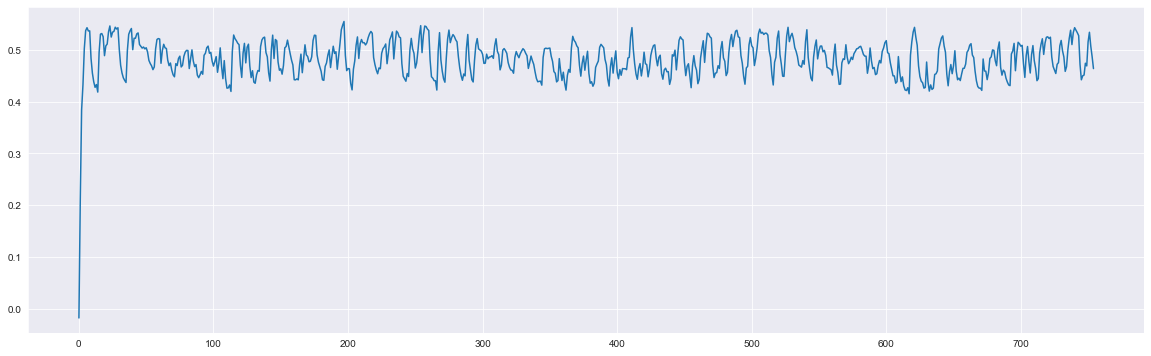

In [360]:
plt.figure(figsize=(20,6))
plt.plot(seq(train_X)[0].detach().numpy())